In [45]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.ensemble import RandomForestClassifier   

import warnings
warnings.filterwarnings("ignore")



# Data Preprocessing

In [46]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
df.shape

(284807, 31)

In [48]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Handle missing values

In [50]:
#checking missing values in columns
df_missing_values = df.isnull().sum()
df_missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Data distribution analysis


In [51]:
classes = df['Class'].value_counts()
classes

# In this 0 repersents number of sucessfully transferred 
# and 1 repersents number fraud accur

0    284315
1       492
Name: Class, dtype: int64

# Data visualisation 

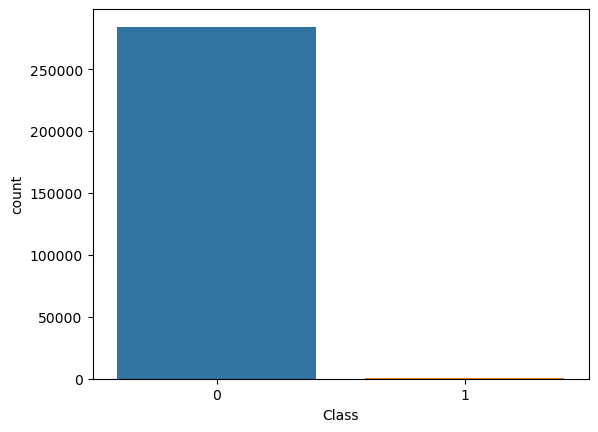

In [52]:
sns.countplot(x='Class', data=df)
plt.show()

#In this graph show number of fraud vs non fraud transition

In [53]:
df.duplicated().any()  # To check Duplicate values

True

In [54]:
df.drop_duplicates(inplace=True)  # to drop duplicate values

In [55]:
df.shape   #  Difine number or row & column 

(283726, 31)

In [56]:
df["Class"].value_counts()   # To print how many values are in column 

0    283253
1       473
Name: Class, dtype: int64

In [57]:
#Class--0 == valid transitions
#Class--1 == fraudulent transitions

# Undersampling method

In [58]:
# X=freatures , Y=target  
X=df.drop("Class",axis=1)
Y=df["Class"]

In [59]:
valid=df[df["Class"]==0]
fraud=df[df["Class"]==1]

In [60]:
valid.shape

(283253, 31)

In [61]:
fraud.shape 

(473, 31)

In [62]:
valid_sample=valid.sample(n=473)

In [63]:
new_df=pd.concat([valid_sample,fraud],ignore_index=True)

In [64]:
new_df["Class"].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [65]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,121670.0,-1.120730,0.146771,1.612266,-1.121365,0.793375,0.165567,0.016161,0.243899,-0.065426,...,0.181095,0.372817,-0.537674,-1.051874,0.555218,0.810920,-0.180447,0.106358,9.50,0
1,28468.0,-0.354615,-0.333226,-0.766329,-3.484571,1.194149,3.072668,-1.162841,1.294132,-2.392941,...,-0.171215,-0.350987,0.030448,0.957568,-0.025851,-0.389862,0.184963,0.019550,15.00,0
2,121854.0,-0.586950,0.190879,1.595510,1.147645,0.670266,-0.538392,-0.042684,0.070988,-0.132400,...,0.016816,0.004217,0.201649,-0.051993,-0.829365,-0.842868,0.252646,0.234893,10.00,0
3,159750.0,2.099065,0.206809,-2.581233,0.473565,0.812996,-1.279560,0.634989,-0.374944,0.292733,...,0.020874,0.173274,-0.006289,0.621637,0.344924,0.689665,-0.110202,-0.054291,9.98,0
4,122907.0,2.047991,-0.978786,-1.457927,-1.028047,-0.433966,-0.654679,-0.412821,-0.200458,-0.788827,...,0.539940,1.348799,-0.049888,0.831415,0.150185,0.011588,-0.057361,-0.054513,85.75,0


In [66]:
X=new_df.drop("Class",axis=1)     # setting target for the model
Y=new_df["Class"]

# #importing train_test_split from sk learn   

In [67]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=50)

# Logistic Regression

In [68]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred1=lr.predict(X_test)

In [69]:
ac=accuracy_score(Y_test,Y_pred1)
cm=confusion_matrix(Y_test,Y_pred1)
cr=classification_report(Y_test,Y_pred1)


print(f"AC :   {ac}\nCM :\n {cm}\nCR : {cr}")

AC :   0.897887323943662
CM :
 [[132   5]
 [ 24 123]]
CR :               precision    recall  f1-score   support

           0       0.85      0.96      0.90       137
           1       0.96      0.84      0.89       147

    accuracy                           0.90       284
   macro avg       0.90      0.90      0.90       284
weighted avg       0.91      0.90      0.90       284



# Random ForestCLassifier

In [70]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred2=rf.predict(X_test)


print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       137
           1       0.95      0.84      0.89       147

    accuracy                           0.89       284
   macro avg       0.90      0.90      0.89       284
weighted avg       0.90      0.89      0.89       284



# DecisionTreeClassifier

In [71]:
from sklearn.tree import DecisionTreeClassifier                # importing  DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
ypred3=dt.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test,ypred3))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       137
           1       0.90      0.89      0.89       147

    accuracy                           0.89       284
   macro avg       0.89      0.89      0.89       284
weighted avg       0.89      0.89      0.89       284



In [72]:
Data=pd.DataFrame({'Models':['LR','RF','DT'],               
             'Accuracy':[accuracy_score(Y_test,Y_pred1)*100,
                    accuracy_score(Y_test,Y_pred2)*100,
                    accuracy_score(Y_test,ypred3)*100
                   ]})

In [73]:
Data

,Models,Accuracy
0,LR,89.788732
1,RF,89.436620
2,DT,89.084507


<Axes: xlabel='Accuracy', ylabel='Models'>

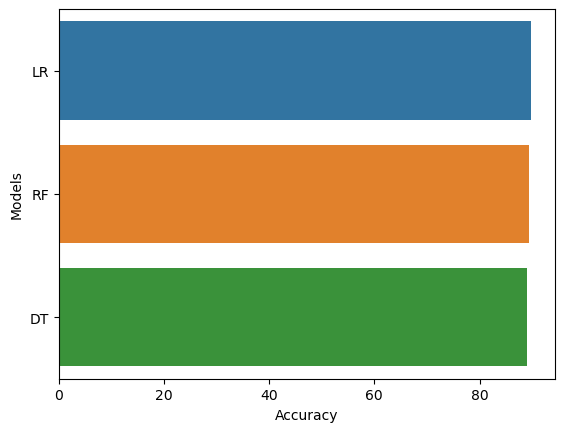

In [74]:
sns.barplot(data=Data,x="Accuracy",y="Models") 

# Conclusion :- Logistic regression is best machine learning model for  Credit Card Fraud Detection Analysis
